# MENG 37100 - Problem Set 5

### Rachel Dey
### 2/7/2023

In [336]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from qutip.measurement import measure, measurement_statistics
from qutip.qip.operations import snot
from qutip.qip.operations import rx
from qutip.qip.operations import ry
from scipy.optimize import curve_fit
import datetime
import qutip.control.pulseoptim as cpo
from qutip.qip.operations import cnot

## Problem 1

### 1.1 

In [438]:
rabi = 0.1*10**6
omega = 1
#energy splittings
es1 = 89*10**3/rabi #splitting between |100> and |101>
es2 = 413*10**3/rabi #splitting between |101> and |111>
#energy difference from desired |111> state
d100 = -es1-es2
d101 = -es2
d110 = -es2+es1
d111 = 0
#hamiltonian from driving at energy split detunings
Hdet=d100*ket2dm(tensor(basis(2,1),basis(2,0),basis(2,0)))+d101*ket2dm(tensor(basis(2,1),basis(2,0),basis(2,1))) +d110*ket2dm(tensor(basis(2,1),basis(2,1),basis(2,0)))

#hamiltonian for going between different NV states
s00 = tensor(basis(2,0),basis(2,0),basis(2,0))*tensor(basis(2,1),basis(2,0),basis(2,0)).dag()
s00 = s00+s00.dag() #h.c.
s01 = tensor(basis(2,0),basis(2,0),basis(2,1))*tensor(basis(2,1),basis(2,0),basis(2,1)).dag()
s01 = s01+s01.dag()
s10 = tensor(basis(2,0),basis(2,1),basis(2,0))*tensor(basis(2,1),basis(2,1),basis(2,0)).dag()
s10 = s10+s10.dag()
s11 = tensor(basis(2,0),basis(2,1),basis(2,1))*tensor(basis(2,1),basis(2,1),basis(2,1)).dag()
s11 = s11+s11.dag()

Hnv=omega/2*(s00+s01+s10+s11)
#Hnv=omega/2*(s11)

H = Hdet+Hnv
psi_ini = tensor(basis(2,0),basis(2,1),basis(2,1))
#psi_ini = tensor(basis(2,0),basis(2,0),basis(2,1))
t_list = np.linspace(0,2*np.pi,100)
e_ops = [ket2dm(tensor(basis(2,0),basis(2,0),basis(2,0))),
         ket2dm(tensor(basis(2,0),basis(2,0),basis(2,1))),
         ket2dm(tensor(basis(2,0),basis(2,1),basis(2,0))),
         ket2dm(tensor(basis(2,0),basis(2,1),basis(2,1))),
         ket2dm(tensor(basis(2,1),basis(2,0),basis(2,0))),
         ket2dm(tensor(basis(2,1),basis(2,0),basis(2,1))),
         ket2dm(tensor(basis(2,1),basis(2,1),basis(2,0))),
         ket2dm(tensor(basis(2,1),basis(2,1),basis(2,1)))]
result=sesolve(H,psi_ini,t_list,e_ops)

Text(0, 0.5, 'Expectation value')

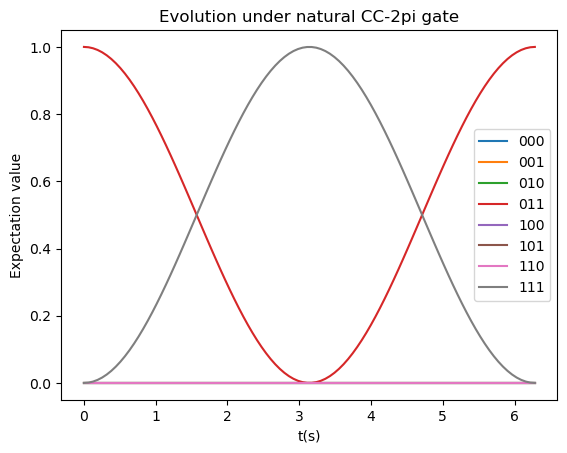

In [439]:
plt.plot(t_list,result.expect[0],label="000")
plt.plot(t_list,result.expect[1],label="001")
plt.plot(t_list,result.expect[2],label="010")
plt.plot(t_list,result.expect[3],label="011")
plt.plot(t_list,result.expect[4],label="100")
plt.plot(t_list,result.expect[5],label="101")
plt.plot(t_list,result.expect[6],label="110")
plt.plot(t_list,result.expect[7],label="111")
plt.legend()
plt.title("Evolution under natural CC-2pi gate")
plt.xlabel("t(s)")
plt.ylabel("Expectation value")

In [457]:
#constructing unitary for later problems
#initial states
psi_000=tensor(basis(2,0),basis(2,0),basis(2,0))
psi_001=tensor(basis(2,0),basis(2,0),basis(2,1))
psi_010=tensor(basis(2,0),basis(2,1),basis(2,0))
psi_011=tensor(basis(2,0),basis(2,1),basis(2,1))
psi_100=tensor(basis(2,1),basis(2,0),basis(2,0))
psi_101=tensor(basis(2,1),basis(2,0),basis(2,1))
psi_110=tensor(basis(2,1),basis(2,1),basis(2,0))
psi_111=tensor(basis(2,1),basis(2,1),basis(2,1))

#resonant driving
t_list=np.linspace(0,2*np.pi,100)
result000=sesolve(H,psi_000,t_list,e_ops)
result001=sesolve(H,psi_001,t_list,e_ops)
result010=sesolve(H,psi_010,t_list,e_ops)
result011=sesolve(H,psi_011,t_list,e_ops)
result100=sesolve(H,psi_100,t_list,e_ops)
result101=sesolve(H,psi_101,t_list,e_ops)
result110=sesolve(H,psi_110,t_list,e_ops)
result111=sesolve(H,psi_111,t_list,e_ops)

def extract_final(exp):
    r=[]
    for i in exp:
        r.append(i[-1])
    return r

def final_state(r):
    return r[0]*psi_000+r[1]*psi_001+r[2]*psi_010+r[3]*psi_011+r[4]*psi_100+r[5]*psi_101+r[6]*psi_110+r[7]*psi_111

psif000=final_state(extract_final(result000.expect))
psif001=final_state(extract_final(result001.expect))
psif010=final_state(extract_final(result010.expect))
psif011=final_state(extract_final(result011.expect))
psif100=final_state(extract_final(result100.expect))
psif101=final_state(extract_final(result101.expect))
psif110=final_state(extract_final(result110.expect))
psif111=final_state(extract_final(result111.expect))

U_act=psif000*psi_000.dag()+psif001*psi_001.dag()+psif010*psi_010.dag()-psif011*psi_011.dag()+psif100*psi_100.dag()+psif101*psi_101.dag()+psif110*psi_110.dag()-psif111*psi_111.dag()
print(U_act)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 9.94940591e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.06038870e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.72428236e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.75758704e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.22873036e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.71379497e-02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.76914045e-10]
 [ 5.05940928e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.94939611e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.75717636e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  9.72424130e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.71269636e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00

### 1.2

In [440]:
#drift Hamiltonian - use center of 4 frequencies
w_c = (89+(413-89)/2)*10**3/rabi
H_d=(d100+w_c)*ket2dm(tensor(basis(2,1),basis(2,0),basis(2,0)))+(d101+w_c)*ket2dm(tensor(basis(2,1),basis(2,0),basis(2,1))) +(d110+w_c)*ket2dm(tensor(basis(2,1),basis(2,1),basis(2,0)))++w_c*ket2dm(tensor(basis(2,1),basis(2,1),basis(2,1)))

#control Hamiltonian - add possibility for complex phase
H_c = [Hnv]

### 1.3 

In [441]:
U_0=tensor(qeye(2),qeye(2),qeye(2))
cyes=ket2dm(basis(2,1))
U_targ=tensor(rx(2*np.pi),cyes,cyes)+tensor(qeye(2),tensor(qeye(2),qeye(2))-tensor(cyes,cyes))
print(U_targ)

# Number of time slots
n_ts = 5
# Time allowed for the evolution
evo_time = 2*np.pi


# Fidelity error target
fid_err_targ = 1e-15
# Maximum iterations for the optisation algorithm
max_iter = 1600
# Maximum (elapsed) time allowed in seconds
max_wall_time = 120
# Minimum gradient (sum of gradients squared)
# as this tends to 0 -> local minima has been found
min_grad = 1e-28

# pulse type alternatives: RND|ZERO|LIN|SINE|SQUARE|SAW|TRIANGLE|
p_type = 'RND'

result = cpo.optimize_pulse_unitary(H_d, H_c, U_0, U_targ, n_ts, evo_time, 
                fid_err_targ=fid_err_targ, min_grad=min_grad,
                max_iter=max_iter, max_wall_time=max_wall_time, phase_option='PSU',
                out_file_ext=None, init_pulse_type=p_type, pulse_scaling=1, gen_stats=True,optim_method='BFGS')

#default optim_method for GRAPE = 'FMIN_L_BFGS_B'
#can add argument alg='CRAB' for which default optim_method = 'FMIN'

print("Final evolution\n{}\n".format(result.evo_full_final))
print("********* Summary *****************")
print("Final fidelity error {}".format(result.fid_err))
print("Terminated due to {}".format(result.termination_reason))
print("Number of iterations {}".format(result.num_iter))
print("Completed in {} HH:MM:SS.US".format(
        datetime.timedelta(seconds=result.wall_time)))
print(np.round(result.evo_full_final.full() / np.exp(1j * np.angle(result.evo_full_final.full()[0][0])),3))
U_f=result.evo_full_final

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]
Final evolution
Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.62198479-0.77975008j  0.        +0.j          0.        +0.j
   0.        +0.j          0.07153154+0.00282482j  0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.29711045-0.92259774j  0.        +0.j
   0.        +0.j          0.        +0.j         -0.19033253+0.15592408j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.43787908-0.87260139j
   0.        +0.j          0.        +0.j         

C:\Users\rsdey\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:566: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
C:\Users\rsdey\Anaconda3\lib\site-packages\qutip\control\optimizer.py:571: OptimizeWarning: Unknown solver options: maxfev
  opt_res = spopt.minimize(


### 1.4

In [467]:
#error for resonant pulse
Utarg_Uact=U_targ.dag()*U_act

def trace(u):
    return u[0][0][0]+u[1][0][1]+u[2][0][2]+u[3][0][3]+u[4][0][4]+u[5][0][5]+u[6][0][6]+u[7][0][7]
err_res = 1-1/8*(abs(trace(Utarg_Uact)))
print("Error for resonant pulse:",np.round(err_res,3),"\n")
print("Error for off-resonant optimized pulse:",np.round(result.fid_err,3))

Error for resonant pulse: 0.027 

Error for off-resonant optimized pulse: 0.292


### 1.5

In [442]:
#initial states
psi_000=tensor(basis(2,0),basis(2,0),basis(2,0))
psi_001=tensor(basis(2,0),basis(2,0),basis(2,1))
psi_010=tensor(basis(2,0),basis(2,1),basis(2,0))
psi_011=tensor(basis(2,0),basis(2,1),basis(2,1))
psi_superpos=(psi_000+psi_001+psi_010+psi_011).unit()

psi_100=tensor(basis(2,1),basis(2,0),basis(2,0))
psi_101=tensor(basis(2,1),basis(2,0),basis(2,1))
psi_110=tensor(basis(2,1),basis(2,1),basis(2,0))
psi_111=tensor(basis(2,1),basis(2,1),basis(2,1))

#desired final states
psid00=psi_000
psid01=psi_001
psid10=psi_010
psid11=-psi_011
psidsup=(psi_000+psi_001+psi_010-psi_011).unit()

#resonant driving
t_list=np.linspace(0,2*np.pi,100)
result000=sesolve(H,psi_000,t_list,e_ops)
result001=sesolve(H,psi_001,t_list,e_ops)
result010=sesolve(H,psi_010,t_list,e_ops)
result011=sesolve(H,psi_011,t_list,e_ops)
resultsuppos=sesolve(H,psi_superpos,t_list,e_ops)

def extract_final(exp):
    r=[]
    for i in exp:
        r.append(i[-1])
    return r

def final_state(r):
    return r[0]*psi_000+r[1]*psi_001+r[2]*psi_010+r[3]*psi_011+r[4]*psi_100+r[5]*psi_101+r[6]*psi_110+r[7]*psi_111

psif000=final_state(extract_final(result000.expect))
psif001=final_state(extract_final(result001.expect))
psif010=final_state(extract_final(result010.expect))
psif011=final_state(extract_final(result011.expect))
psifsup=final_state(extract_final(resultsuppos.expect))

print("fidelities for resonant")
print("init: 000:",fidelity(psid00,psif000))
print("init: 001:",fidelity(psid01,psif001))
print("init: 010:",fidelity(psid10,psif010))
print("init: 011:",fidelity(psid11,psif011))
print("init: superposition:",fidelity(psidsup,psifsup),"\n")

#optimized pulse sequence
psiof000=U_f*psi_000
psiof001=U_f*psi_001
psiof010=U_f*psi_010
psiof011=U_f*psi_011
psiofsup=U_f*psi_superpos

print("fidelities for off-resonant")
print("init: 000:",fidelity(psid00,psiof000))
print("init: 001:",fidelity(psid01,psiof001))
print("init: 010:",fidelity(psid10,psiof010))
print("init: 011:",fidelity(psid11,psiof011))
print("init: superposition:",fidelity(psidsup,psiofsup))

fidelities for resonant
init: 000: 0.9949405907166723
init: 001: 0.9724282364043392
init: 010: 0.9228730364419278
init: 011: 0.9999999996230859
init: superposition: 0.23627941418535792 

fidelities for off-resonant
init: 000: 0.9974343385123297
init: 001: 0.9692580716787732
init: 010: 0.9763049048541289
init: 011: 0.9974343385123295
init: superposition: 0.8394128558004911


### 1.6

For 000, 010, and the superposition, the optimized gate performs better. For the other two the resonant driven gate performs better. 000, 001, and 010 have pretty similar fidelities for both. The fidelity for the resonant gate for 011 is really high for the 011 initial state but still pretty good for the optimized gate. For the superposition state, the off-resonant gate has a much better fidelity. Overall, I would say the optimized gate is better because of the large difference in the superposition state.

## Problem 2 

### 2.3 

In [122]:
#first bloch sphere with 0,1 and 0,r
b=Bloch()
b.zlabel=[r'$\left|0,1\right>$', r'$\left|0,r\right>$']
b.point_marker = 'o'
b.point_color = 'b'
b.vector_color = ['#99eeff','#33ddff','#00bfe6','#0095b3','#006a80','#005566']
#all states are in the (|0,1>, |0,r> basis)
psi_i = basis(2,1)
#first pulse in S sequence rotates around x axis
#adding points in between to show path
for i in range(1,20):
    p = rx(np.pi/(2*np.sqrt(2))*i/20)*psi_i
    b.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
u1 = rx(np.pi/(2*np.sqrt(2)))
psi_1 = u1*psi_i

#second pulse in S sequence is pi rotation around y axis
for i in range(1,20):
    p = ry(np.pi*i/20)*psi_1
    b.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
u2 = ry(np.pi)
psi_2 = u2*psi_1

#third pulse is same as first
for i in range(1,20):
    p = rx(np.pi/(2*np.sqrt(2))*i/20)*psi_2
    b.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_3 = u1*psi_2

#repeat process
#first pulse in S sequence rotates around x axis
#adding points in between to show path
for i in range(1,20):
    p = rx(np.pi/(2*np.sqrt(2))*i/20)*psi_3
    b.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_4 = u1*psi_3

#second pulse in S sequence is pi rotation around y axis
for i in range(1,20):
    p = ry(np.pi*i/20)*psi_4
    b.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_5 = u2*psi_4

#third pulse is same as first
for i in range(1,20):
    p = rx(np.pi/(2*np.sqrt(2))*i/20)*psi_5
    b.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_6 = u1*psi_5

states = [psi_i,psi_1,psi_2,psi_3,psi_4,psi_5,psi_6]
for i in states:
    b.add_states(i)

b.view=[-45,10]
b.zlpos=[-1.1,1.1]

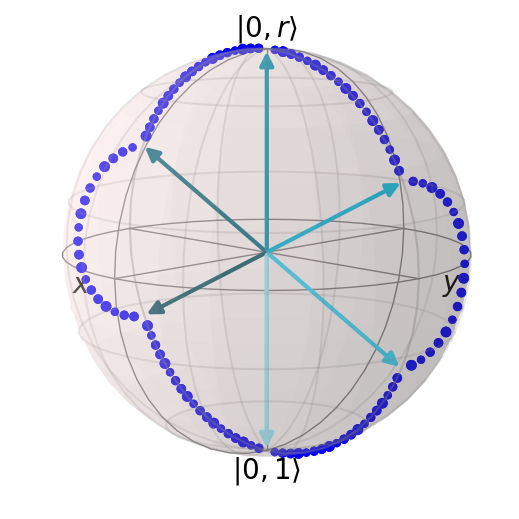

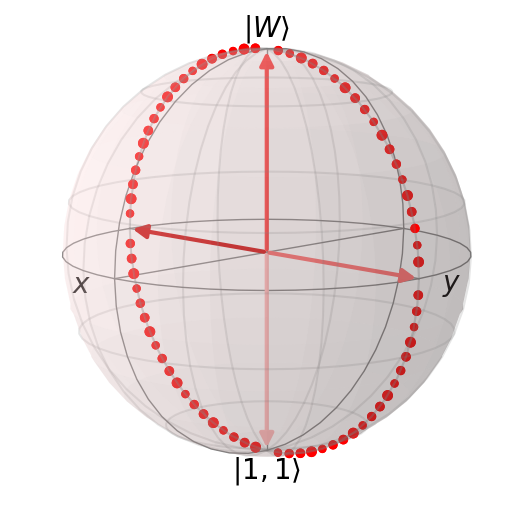

In [123]:
#second bloch sphere for |1,1> and |W>
b1=Bloch()
b1.zlabel=[r'$\left|1,1\right>$', r'$\left|W\right>$']
b1.point_marker = 'o'
b1.point_color = 'r'
b1.vector_color = ['#ffb3b3','#ff6666','#ff3333','#cc0000']
#all states are in the (|1,1>, |W> basis)
psi_i = basis(2,1)a
#first pulse in S sequence rotates around x axis (pi/2)
#adding points in between to show path
for i in range(1,20):
    p = rx(np.pi/2*i/20)*psi_i
    b1.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
u1 = rx(np.pi/2)
psi_1 = u1*psi_i

#second pulse in S sequence is pi rotation around y axis
#this does not change the state as it already lies on the y axis

#third pulse is same as first
for i in range(1,20):
    p = rx(np.pi/(2)*i/20)*psi_1
    b1.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_3 = u1*psi_1

#repeat process
#first pulse in S sequence rotates around x axis (pi/2)
#adding points in between to show path
for i in range(1,20):
    p = rx(np.pi/(2)*i/20)*psi_3
    b1.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_4 = u1*psi_3

#second pulse in S sequence is pi rotation around y axis
#this does not change the state as it already lies on the y axis

#third pulse is same as first
for i in range(1,20):
    p = rx(np.pi/2*i/20)*psi_4
    b1.add_points([expect(sigmax(),p),expect(sigmay(),p),expect(sigmaz(),p)])
psi_6 = u1*psi_4

states = [psi_i,psi_1,psi_3,psi_4]
for i in states:
    b1.add_states(i)

b1.view=[-45,10]
b1.zlpos=[-1.1,1.1]
b.show()
b1.show()

### 2.4 

Show transformation of |00>,|01>,|10>,|11> and then get final fidelity. |00> is trivially invariant under the transformation.

In [239]:
# |01> and |10>
def U1(epsilon):
    u1=rx((1+epsilon)*np.pi/(2*np.sqrt(2)))
    u2=ry((1+epsilon)*np.pi)
    return u1*u2*u1*u1*u2*u1

In [241]:
# |11>
def U2(epsilon):
    u1=rx((1+epsilon)*np.pi/2)
    u2=ry((1+epsilon)*np.pi)
    return u1*u2*u1*u1*u2*u1

Text(0, 0.5, '$F(\\epsilon)$')

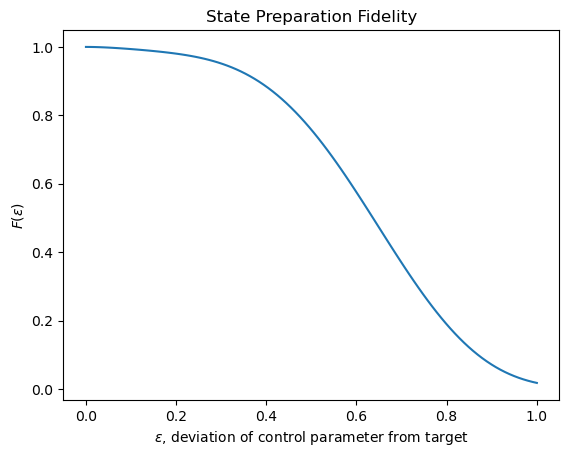

In [242]:
def fidelity(e):
    fsq = 1-2*(U1(e)*basis(2,0))[0]-(U2(e)*basis(2,0))[0]
    return np.real((fsq**2/16)[0][0])
fid = np.vectorize(fidelity)

x1=np.linspace(0,1,100)
f1=fid(x1)
plt.plot(x1,f1)
plt.title("State Preparation Fidelity")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$F(\epsilon)$")

For the $\epsilon$ << 1 regime:

n is fitted as 1.9968716017111219 which is about 2.
a is fitted as 0.9479505875739825


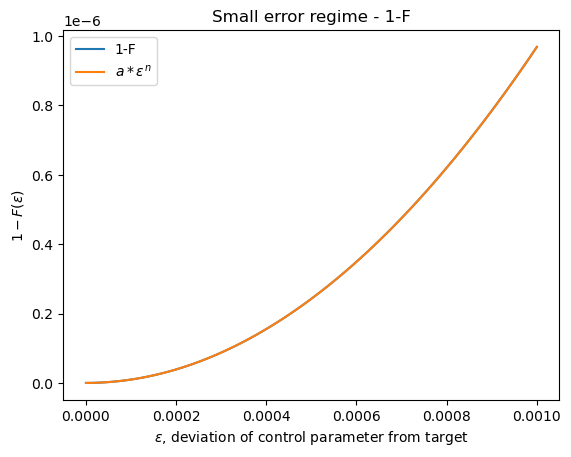

In [237]:
x2=np.linspace(0,0.001,100)
f2=1-fid(x2)
plt.plot(x2,f2,label="1-F")
plt.title("Small error regime - 1-F")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$1-F(\epsilon)$")

def eppower(x,A,B):
    return B*x**A

parameters1, covariance = curve_fit(eppower, x2, f2)
plt.plot(x2,parameters1[1]*x2**parameters1[0],label="$a*\epsilon^n$")
plt.legend()
print("n is fitted as", parameters1[0], "which is about 2.")
print("a is fitted as", parameters1[1])

### 2.5 

Text(0, 0.5, '$F(\\epsilon)$')

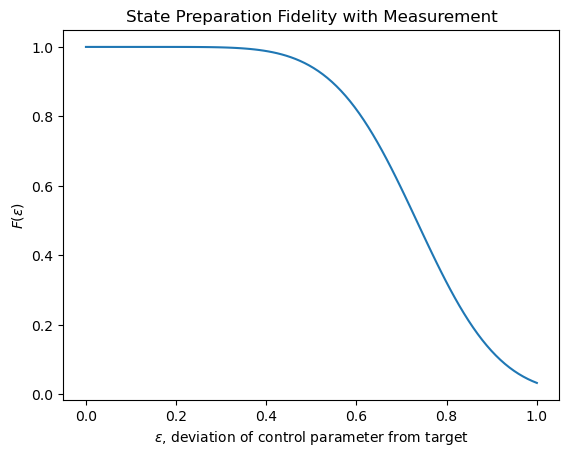

In [234]:
def fidelity_meas(e):
    fc = 4*(1+2*(U1(e)*basis(2,0))[0]**2+(U2(e)*basis(2,0))[0]**2)
    fs = 1-2*(U1(e)*basis(2,0))[0]-(U2(e)*basis(2,0))[0]
    return np.real((fs**2/fc)[0][0])
fid_meas = np.vectorize(fidelity_meas)

x3=np.linspace(0,1,100)
f3=fid_meas(x3)
plt.plot(x3,f3)
plt.title("State Preparation Fidelity with Measurement")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$F(\epsilon)$")

n' is fitted as 3.993656301699697 which is about 4.
a is fitted as 0.22447745170679867


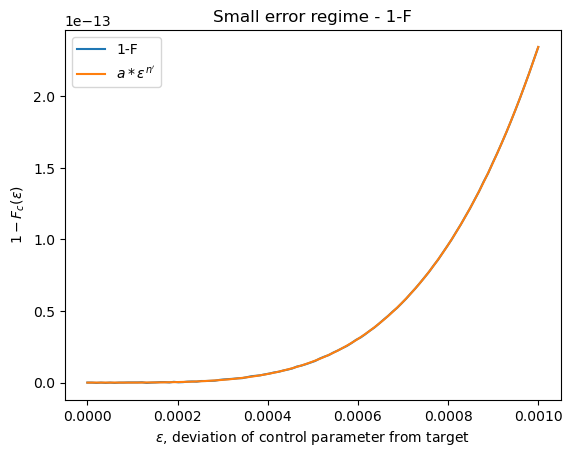

In [236]:
x4=np.linspace(0,0.001,100)
f4=1-fid_meas(x4)
plt.plot(x4,f4,label="1-F")
plt.title("Small error regime - 1-F")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$1-F_c(\epsilon)$")

def eppower(x,A,B):
    return B*x**A

parameters2, covariance = curve_fit(eppower, x4, f4)
plt.plot(x4,parameters2[1]*x4**parameters2[0],label="$a*\epsilon^{n'}$")
plt.legend()
print("n' is fitted as", parameters2[0], "which is about 4.")
print("a is fitted as", parameters2[1])

Text(0, 0.5, '$F(\\epsilon)$')

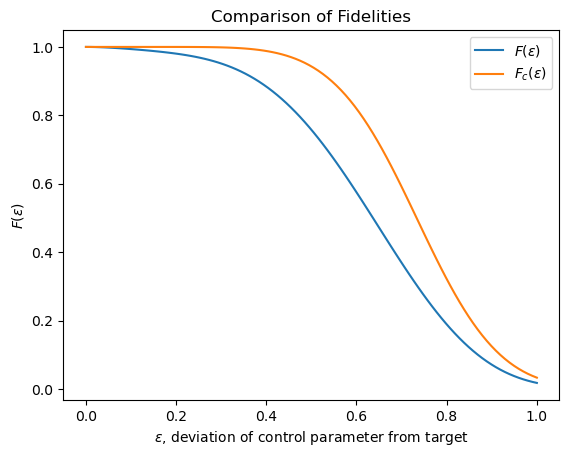

In [235]:
#comparison of fidelities
plt.plot(x1,f1,label="$F(\epsilon)$")
plt.plot(x3,f3,label="$F_c(\epsilon)$")
plt.legend()
plt.title("Comparison of Fidelities")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$F(\epsilon)$")

### 2.6 

In [262]:
# |11>
def pi2_2(epsilon):
    u1=rx((1+epsilon)*np.pi/2)
    u2=ry((1+epsilon)*np.pi)
    u3=ry((1+epsilon)*np.pi/2)
    u4=rx((1+epsilon)*np.pi)
    return (u3*-u4*u3*u1*u2*u1)
    #return u1*u2*u1

# |01> and |10>
def pi2_1(epsilon):
    u1=rx((1+epsilon)*np.pi/(2*np.sqrt(2)))
    u2=ry((1+epsilon)*np.pi)
    u3=ry((1+epsilon)*np.pi/(2*np.sqrt(2)))
    u4=rx((1+epsilon)*np.pi)
    return (u3*-u4*u3*u1*u2*u1)

#(pi2_1(0.1)*basis(2,0))[0][0][0]*basis(2,0)+(pi2_1(0.1)*basis(2,1))[0][0][0]*basis(2,1)

<>:16: DeprecationWarning: invalid escape sequence \e
<>:16: DeprecationWarning: invalid escape sequence \e
C:\Users\rsdey\AppData\Local\Temp\ipykernel_14604\1400002435.py:16: DeprecationWarning: invalid escape sequence \e
  plt.ylabel("$F(\epsilon)$")


Text(0, 0.5, '$F(\\epsilon)$')

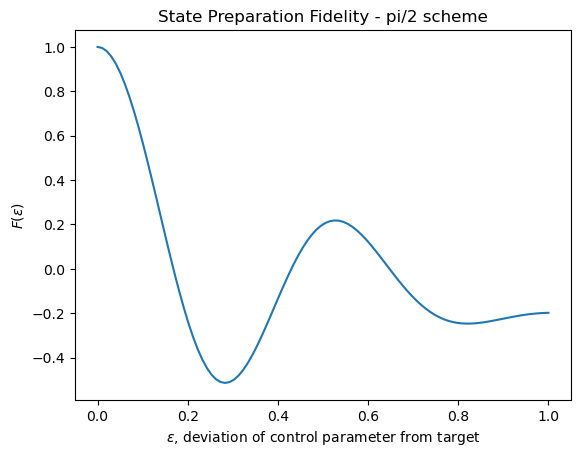

In [496]:
def fidelitypi2(e):
    psi_01_10 = (pi2_1(e)*basis(2,0))[0][0][0]*basis(2,0)+(pi2_1(e)*basis(2,1))[0][0][0]*basis(2,1)
    psi_11 = (pi2_2(e)*basis(2,0))[0][0][0]*basis(2,0)+(pi2_2(e)*basis(2,1))[0][0][0]*basis(2,1)
    #print((pi2_2(e)*psi_11)[0][0][0])
    fsq = 1-2*(pi2_1(e)*psi_01_10)[0]-(pi2_2(e)*psi_11)[0]
    return np.real((fsq**2/16)[0][0])

#print(fidelitypi2(0.1))
fidpi2 = np.vectorize(fidelitypi2)

x5=np.linspace(0,1,100)
f5=fidpi2(x5)
plt.plot(x5,f5)
plt.title("State Preparation Fidelity - pi/2 scheme")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$F(\epsilon)$")


<>:6: DeprecationWarning: invalid escape sequence \e
<>:12: DeprecationWarning: invalid escape sequence \e
<>:6: DeprecationWarning: invalid escape sequence \e
<>:12: DeprecationWarning: invalid escape sequence \e
C:\Users\rsdey\AppData\Local\Temp\ipykernel_14604\529896585.py:6: DeprecationWarning: invalid escape sequence \e
  plt.ylabel("$1-F_c(\epsilon)$")
C:\Users\rsdey\AppData\Local\Temp\ipykernel_14604\529896585.py:12: DeprecationWarning: invalid escape sequence \e
  plt.plot(x6,parameters3[1]*x6**parameters3[0],label="$a*\epsilon^{n'}$")


n' is fitted as 2.0006092619169444 which is about 2.
a is fitted as 25.847813746431672


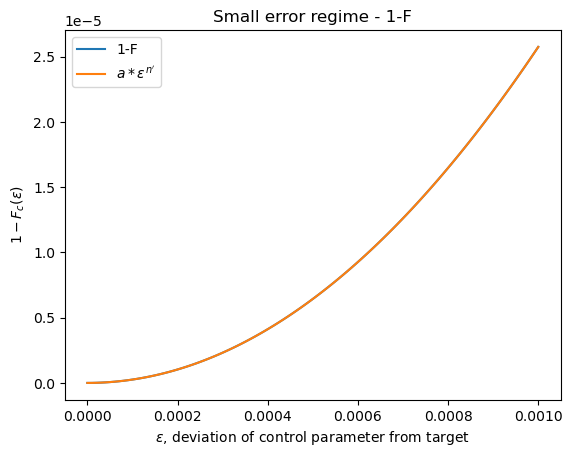

In [485]:
x6=np.linspace(0,0.001,100)
f6=1-fidpi2(x6)
plt.plot(x6,f6,label="1-F")
plt.title("Small error regime - 1-F")
plt.xlabel(r'$\epsilon$, deviation of control parameter from target')
plt.ylabel("$1-F_c(\epsilon)$")

def eppower(x,A,B):
    return B*x**A

parameters3, covariance = curve_fit(eppower, x6, f6)
plt.plot(x6,parameters3[1]*x6**parameters3[0],label="$a*\epsilon^{n'}$")
plt.legend()
print("n' is fitted as", parameters3[0], "which is about 2.")
print("a is fitted as", parameters3[1])